In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The Dataset contains details of scores of 100 students in Exam-1 and EXam-2 based on which they are admitted to the college

In [49]:
logistic_data = pd.read_csv(r"./LogisticRegressionData.txt")

In [50]:
logistic_data

,Exam-1 Score,Exam-2 score,output
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Visualize the data & its spread

In [51]:
def plot_fn(X,Y,length):
    positive = (Y==1).reshape(length,1)
    negative = (Y==0).reshape(length,1)
    plt.scatter(X[positive[:,0],0],X[positive[:,0],1],c="r",marker='x')
    plt.scatter(X[negative[:,0],0],X[negative[:,0],1],c="b",marker='o')
    plt.xlabel("Exam-1 Score")
    plt.ylabel("Exam-2 Score")
    plt.title("Visualization Plot between exam 1 and exam 2")
    plt.show()

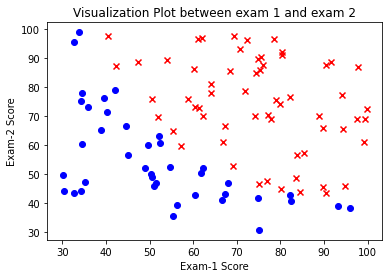

In [52]:
log_reg_data = logistic_data.values
X = log_reg_data[:,0:log_reg_data.shape[1]-1]
y = log_reg_data[:,-1]
X1 = log_reg_data[:,0:log_reg_data.shape[1]-1]
length = len(y)
plot_fn(X,y,length)

## Logistic Regression

In [53]:
def Sigmoid_fn(Z):
    return(1/(1 + np.exp(-Z)))

In [54]:
def Prediction(X,weights):
    Z = np.dot(X,weights)
    y_hat = Sigmoid_fn(Z)
    return y_hat

In [55]:
def Compute_cost(y,y_hat,length):
    J = -(1/length)* np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return J

In [56]:
def Gradient_descent(num_iterations,X,y,weights,cost,alpha,length):
    for i in range(1,num_iterations+1):
        y_hat = Prediction(X,weights)
        descent_direction = (1/length)*np.dot(X.transpose(),(y_hat - y))
        descent_step = alpha * descent_direction
        weights -= descent_step
        cost.append(Compute_cost(y,y_hat,length))
    return weights,cost

In [57]:
def feature_scaling(X):
    X_mean = np.mean(X,axis=0)
    X_std = np.std(X,axis=0)
    X_norm = (X - X_mean) / X_std
    return X_norm

In [58]:
def Initialize_Parameters(X,y,length):
    X = X.reshape(length,X.shape[1])
    X = feature_scaling(X)
    X = np.append(np.ones((length,1)),X,axis=1)
    y = y.reshape(length,1)
    weights = np.zeros((X.shape[1],1))
    return X,y,weights

In [59]:
X,y,weights = Initialize_Parameters(X,y,length)
#weights = np.zeros((X.shape[1],1))
num_iterations = 1600
cost = []
alpha = 0.09
final_weights,cost = Gradient_descent(num_iterations,X,y,weights,cost,alpha,length)

In [60]:
def plot_cost(cost,num_iterations):
    iterations = [i for i in range(1,num_iterations+1)]
    plt.plot(iterations,cost,color="g")
    plt.title("cost v/s Num of Iterations")
    plt.show()

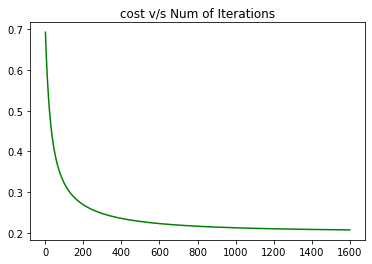

In [61]:
plot_cost(cost,num_iterations)

In [62]:
print("The final trained optimal weights:","\n",final_weights)

The final trained optimal weights: 
 [[1.40165808]
 [3.32175376]
 [3.07634558]]


## Test how the cost function varies on varying the learning rate

In [63]:
def check_variation(num_iterations,X,y,weights,length):
    for alpha in np.arange(0.01,0.1,0.01):
        alpha = alpha.round(3)
        cost =[]
        weights = np.zeros((X.shape[1],1))
        _,cost = Gradient_descent(num_iterations,X,y,weights,cost,alpha,length)
        plot_cost(cost,num_iterations)
    return weights

Please Enter the number of Iterations you want the Gradient Descent to run:1400


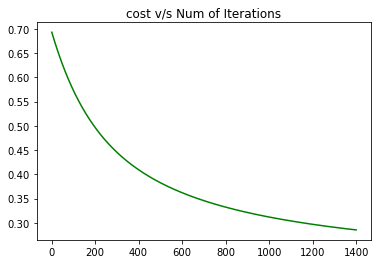

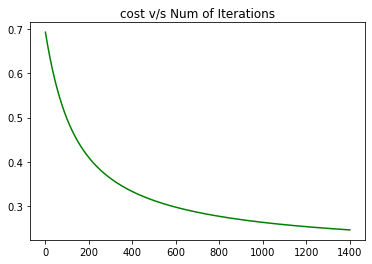

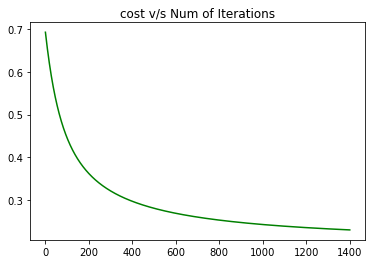

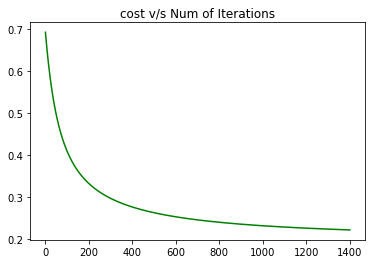

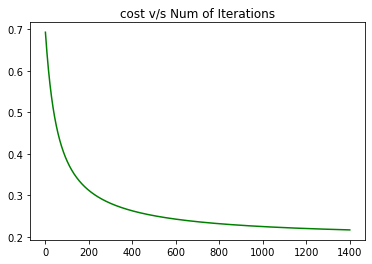

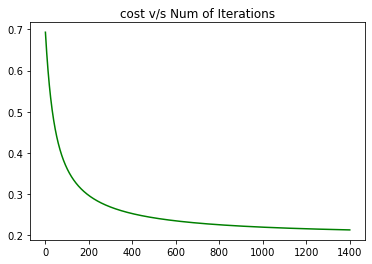

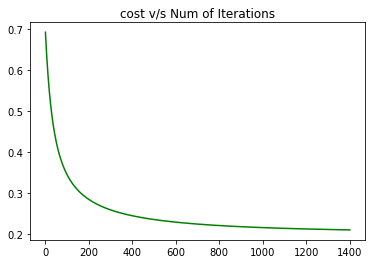

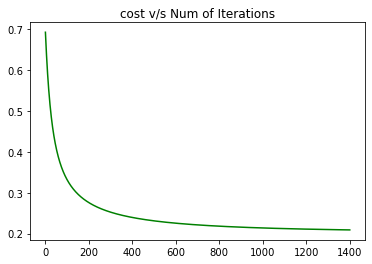

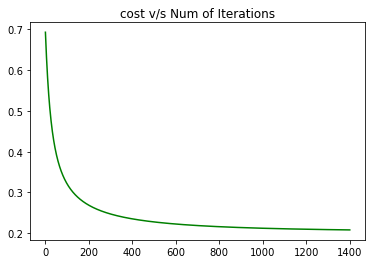

In [68]:
X,y,weights = Initialize_Parameters(X1,y,length)
num_iterations = int(input("Please Enter the number of Iterations you want the Gradient Descent to run:"))
weights = check_variation(num_iterations,X,y,weights,length)

## Test on some sample input

In [69]:
x_test = np.array([45,85])
X_mean = np.mean(x_test,axis=0)
X_std = np.mean(x_test,axis=0)
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = Prediction(x_test,final_weights)
print(prob)
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

[0.79020273]
For a student with scores 45 and 85, we predict an admission probability of 0.7902027339547962


## Visualize the result

In [70]:
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value = -(weights[0] + weights[1]*x_value)/weights[2]

In [71]:
def plot_result(X,Y,length,x_value,y_value):
    positive = (Y==1).reshape(length,1)
    negative = (Y==0).reshape(length,1)
    plt.scatter(X[positive[:,0],1],X[positive[:,0],2],c="r",marker='x',label="Admitted")
    plt.scatter(X[negative[:,0],1],X[negative[:,0],2],c="b",marker='o',label="Not Admitted")
    plt.plot(x_value,y_value, "g")
    plt.xlabel("Exam-1 Score")
    plt.ylabel("Exam-2 Score")
    plt.title("Visualization Plot between exam 1 and exam 2")
    plt.legend()
    plt.show()

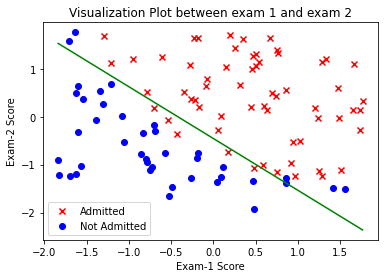

In [72]:
plot_result(X,y,length,x_value,y_value)

## Logistic Regression Using Sklearn Library

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logistic_reg = LogisticRegression()

In [75]:
inp_vals = log_reg_data[:,0:log_reg_data.shape[1]-1]
out_vals = log_reg_data[:,-1]
model = logistic_reg.fit(inp_vals,out_vals)

In [76]:
model.coef_,model.intercept_

(array([[0.20535491, 0.2005838 ]]), array([-25.05219314]))

In [77]:
x_value1= np.array([np.min(inp_vals[:,1]),np.max(inp_vals[:,1])])
y_value1 = -(model.intercept_[0] + model.coef_[0][0]*x_value1)/model.coef_[0][1]

In [78]:
def plot_result(X,Y,length,x_value,y_value):
    positive = (Y==1).reshape(length,1)
    negative = (Y==0).reshape(length,1)
    plt.scatter(X[positive[:,0],0],X[positive[:,0],1],c="r",marker='x',label="Admitted")
    plt.scatter(X[negative[:,0],0],X[negative[:,0],1],c="b",marker='o',label="Not Admitted")
    plt.plot(x_value,y_value, "g")
    plt.xlabel("Exam-1 Score")
    plt.ylabel("Exam-2 Score")
    plt.title("Visualization Plot between exam 1 and exam 2")
    plt.legend()
    plt.show()

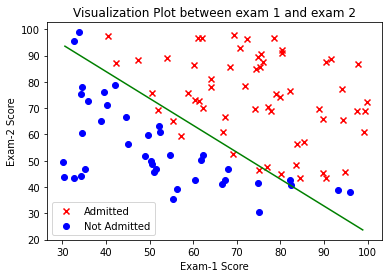

In [79]:
plot_result(inp_vals,out_vals,length,x_value1,y_value1)